In [1]:
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import cv2

In [2]:
# wczytanie zdjęcia
img = cv2.imread("/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/Apple 1.png")



<Figure size 1440x1440 with 0 Axes>

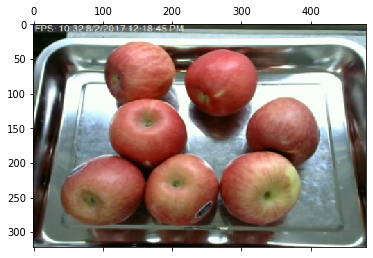

In [3]:
# Display the resulting frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
# plt.gray()
plt.matshow(img)
plt.show()

In [4]:
import glob

In [5]:
apple_a= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple A/*.png')

In [6]:
apple_b= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple B/*.png')

In [7]:
apple_c= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple C/*.png')

In [8]:
apple_d= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple D/*.png')

In [9]:
apple_e= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple E/*.png')

In [10]:
apple_f= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Apple F/*.png')

In [11]:
#applesAll= glob.glob('/home/pawcio/Desktop/big_data_science_course/Projekty/dataset dl/Apple/Total Number of Apples/*.png')

In [12]:
# n_applesAll = len(apples)
# n_applesAll

In [13]:
apples = apple_a+apple_e
n_apples = len(apples)
n_apples

1356

In [14]:
img_height, img_width = 150, 150

In [15]:
apples_array = np.empty((n_apples, img_height, img_width, 3))
apples_list = []

In [16]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
        
    apples_array[i] = image

In [17]:
for i, path in enumerate(apples):
    image = cv2.imread(path)
    if image.shape[:-1] != (img_height, img_width):
        image = cv2.resize(image, (img_width, img_height))
    apples_list.append(image)

In [18]:
len(apples_list)

1356

In [19]:
apples_array_bis = np.stack(apples_list)

In [20]:
apples_array_bis.shape

(1356, 150, 150, 3)

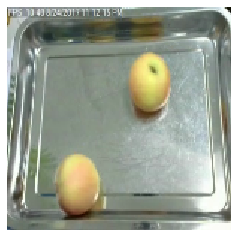

In [21]:
img = cv2.cvtColor(apples_array_bis[1000], cv2.COLOR_BGR2RGB)
plt.matshow(img)
plt.axis('off')
plt.show()

In [22]:
applesPaths = [apple_a, apple_e]

In [30]:
x = np.zeros((1356, 150, 150, 3))
y = np.zeros(1356,)

In [31]:
idx = 0
for i in range(len(applesPaths)):
    appleClass = i
    for path in applesPaths[i]:
        # wczytywanie
        x[idx] = n_apples
        y[idx] = appleClass
        idx += 1

In [33]:
print(x.shape)
y.shape

(1356, 150, 150, 3)


(1356,)

In [36]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [40]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (1017, 150, 150, 3)
y_train shape (339, 150, 150, 3)
x_test shape (1017,)
y_test shape (339,)
